In [173]:
# Read the CSV file
df = pd.read_csv("cleaned_EDA.csv")
df.head()

,Year,continents,Area,Average dietary energy requirement (kcal/cap/day),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),"Gross domestic product per capita, PPP, (constant 2017 international $)",...,Percentage of children under 5 years of age who are stunted (modelled estimates) (percent),Political stability and absence of violence/terrorism (index),Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),Prevalence of obesity in the adult population (18 years and older) (percent),Prevalence of undernourishment (percent) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),Water & Sanitation Index (percent),Moderate+Severe Food Insecurity (percent),Severe Food Insecurity (percent)
0,2014,Africa,Algeria,2321.0,99.4,94.9,29.8,70.2,3437.0,13515.3,...,11.1,-1.19,49.2,19.7,2.9,48.0,14.0,90.0,22.888889,13.011111
1,2014,Africa,Angola,2129.0,57.4,55.4,22.0,65.6,2553.0,10262.8,...,34.1,-0.33,49.2,9.0,13.2,60.0,6.0,50.0,47.361362,14.070843
2,2014,Africa,Benin,2204.0,51.2,70.1,17.5,44.2,2656.0,3104.2,...,33.1,0.03,41.4,8.6,9.3,66.0,65.0,41.0,55.011111,10.444444
3,2014,Africa,Botswana,2334.0,74.4,71.7,32.2,95.5,2550.0,16381.1,...,23.2,1.01,49.2,15.3,20.8,48.0,9.0,80.5,46.466667,18.433333
4,2014,Africa,Burkina Faso,2198.0,61.5,76.4,12.3,13.8,2648.0,2094.1,...,29.9,-0.79,50.1,4.2,13.5,65.0,18.0,35.5,58.245463,21.377556


In [174]:
df.columns

Index(['Year', 'continents', 'Area',
       'Average dietary energy requirement (kcal/cap/day)',
       'Average fat supply (g/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Percentage of children under 5 years affected by wasting (percent)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Percentage of children under 5 ye

In [175]:
num_cols = df.select_dtypes(include=['Float64', 'int64']).columns
df[num_cols] = df[num_cols].round(1)

In [176]:
df

,Year,continents,Area,Average dietary energy requirement (kcal/cap/day),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),"Gross domestic product per capita, PPP, (constant 2017 international $)",...,Percentage of children under 5 years of age who are stunted (modelled estimates) (percent),Political stability and absence of violence/terrorism (index),Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),Prevalence of obesity in the adult population (18 years and older) (percent),Prevalence of undernourishment (percent) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),Water & Sanitation Index (percent),Moderate+Severe Food Insecurity (percent),Severe Food Insecurity (percent)
0,2014,Africa,Algeria,2321.0,99.4,94.9,29.8,70.2,3437.0,13515.3,...,11.1,-1.2,49.2,19.7,2.9,48.0,14.0,90.0,22.9,13.0
1,2014,Africa,Angola,2129.0,57.4,55.4,22.0,65.6,2553.0,10262.8,...,34.1,-0.3,49.2,9.0,13.2,60.0,6.0,50.0,47.4,14.1
2,2014,Africa,Benin,2204.0,51.2,70.1,17.5,44.2,2656.0,3104.2,...,33.1,0.0,41.4,8.6,9.3,66.0,65.0,41.0,55.0,10.4
3,2014,Africa,Botswana,2334.0,74.4,71.7,32.2,95.5,2550.0,16381.1,...,23.2,1.0,49.2,15.3,20.8,48.0,9.0,80.5,46.5,18.4
4,2014,Africa,Burkina Faso,2198.0,61.5,76.4,12.3,13.8,2648.0,2094.1,...,29.9,-0.8,50.1,4.2,13.5,65.0,18.0,35.5,58.2,21.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,2023,South_America,Guyana,2318.0,94.7,101.5,46.4,4.1,3404.0,27138.8,...,9.3,-0.4,47.0,26.2,2.5,47.0,1.5,81.5,25.5,4.7
1566,2023,South_America,Paraguay,2370.0,92.4,89.9,40.8,8.7,3006.0,20921.0,...,9.8,-0.1,41.5,27.0,4.5,47.1,33.8,85.2,26.2,6.6
1567,2023,South_America,Peru,2317.0,72.8,79.4,30.4,66.3,2804.0,6157.5,...,13.8,-0.2,43.6,23.1,7.0,51.5,56.9,71.4,51.7,20.3
1568,2023,South_America,Suriname,2390.0,73.5,75.9,32.2,52.9,2625.0,12334.0,...,9.3,0.1,32.2,27.9,10.1,49.6,77.1,81.2,35.8,7.2


In [177]:
df['continents'].value_counts()

continents
Africa           510
Asia             380
Europe           360
North_America    220
South_America    100
Name: count, dtype: int64

## Exploratory Data Analysis

### Global Food Insecurity

In [178]:
fig = px.choropleth(
    df,
    locations='Area',
    locationmode='country names',
    color='Moderate+Severe Food Insecurity (percent)',
    hover_name='Area',
    animation_frame='Year',
    color_continuous_scale='Reds',
    title='Global Food Insecurity (%)',
    labels={'Moderate+Severe Food Insecurity (percent)': 'Food Insecurity (%)'}
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    width = 1000,
    height = 600
    )
fig.show()

### Top 10 countries with Highest Moderate and Severe Food Insecurity

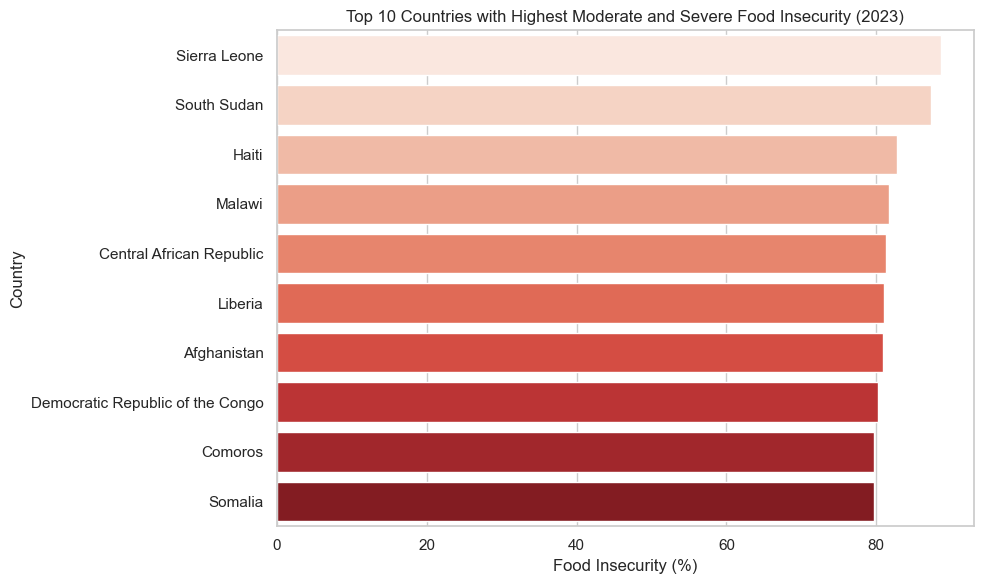

In [179]:
top10 = df[df['Year'] == 2023].nlargest(10, 'Moderate+Severe Food Insecurity (percent)')

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'Moderate+Severe Food Insecurity (percent)',
    y = 'Area',
    hue = 'Area',
    data = top10,
    palette = 'Reds',
    dodge = False
)
plt.title('Top 10 Countries with Highest Moderate and Severe Food Insecurity (2023)')
plt.xlabel('Food Insecurity (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Global Food Insecurity Trend

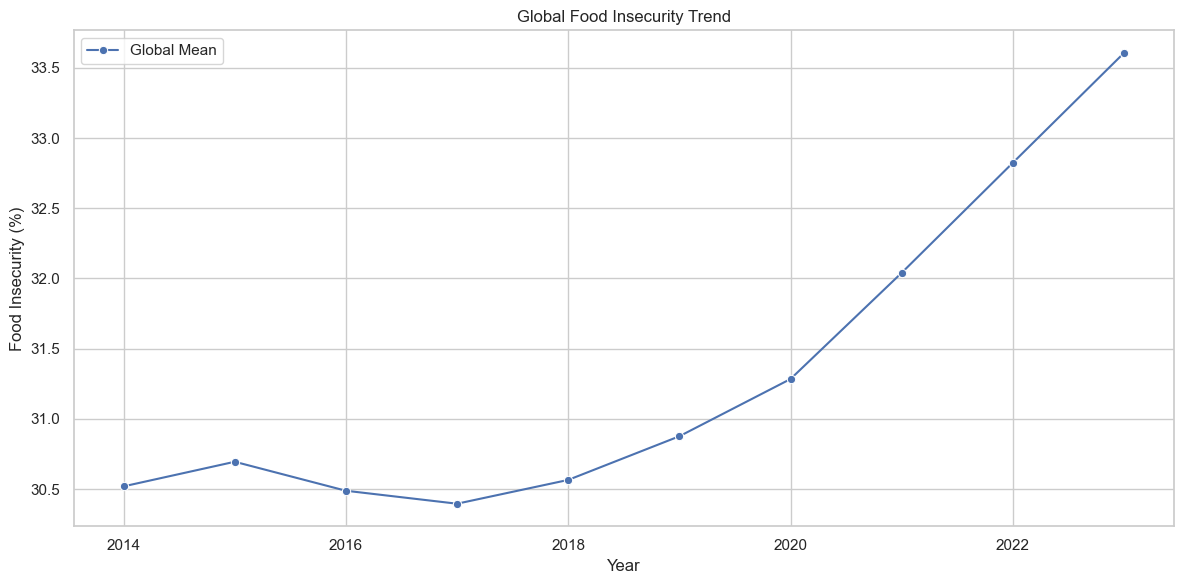

In [180]:
fi_mean = df.groupby('Year')['Moderate+Severe Food Insecurity (percent)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x = 'Year',
    y = 'Moderate+Severe Food Insecurity (percent)',
    data = fi_mean,
    errorbar = None,
    marker = 'o',
    label = 'Global Mean'
)
plt.title('Global Food Insecurity Trend')
plt.xlabel('Year')
plt.ylabel('Food Insecurity (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Analysis**

Based on the trend, the food insecurity rates was drastically increased from 2017 to 2023.

## Food Insecurity Trends by Continents

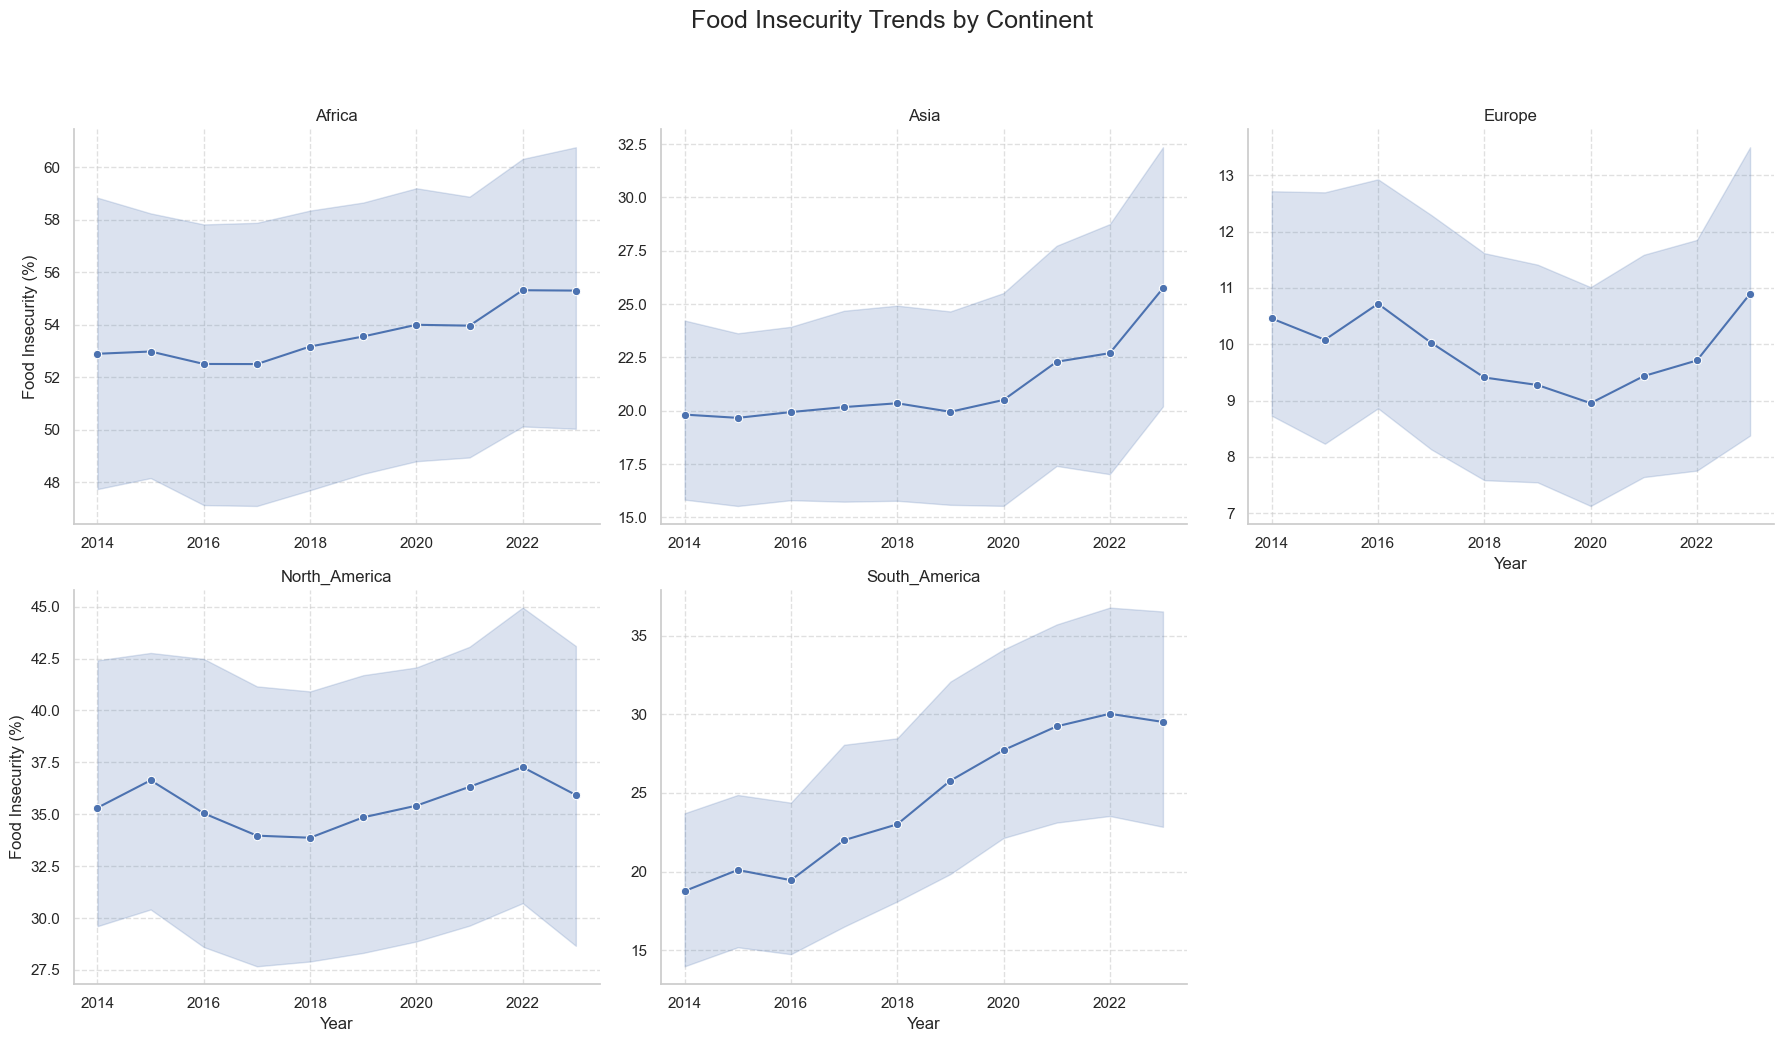

In [181]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(
    df,
    col='continents',
    col_wrap=3,
    height=5,
    sharey=False,
    aspect=1.2,
    palette="Set2"
)
g.map(sns.lineplot, 'Year', 'Moderate+Severe Food Insecurity (percent)', marker='o')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Food Insecurity (%)")

for ax in g.axes.flat:
    ax.tick_params(axis='x')
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.grid(True, linestyle='--', alpha=0.6)

g.fig.suptitle('Food Insecurity Trends by Continent', fontsize=18, y=1.04)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()

plt.show()

**Analysis**
1. Africa has the highest levels of food insecurity, with percentages ranging from 52% to 56%.
2. In Asia, food insecurity ranges between 17.5% and 27.5%.
3. Europe has the lowest reported food insecurity, between 9% and 11%.
4. North America shows relatively high food insecurity levels, ranging from 32.5% to 37.5%.
5. In South America, food insecurity varies between 15% and 30%.

 Africa records the highest food insecurity rate, whereas Europe has the lowest among all continents.

### Correlation between Food Insecurity and GDP Growth

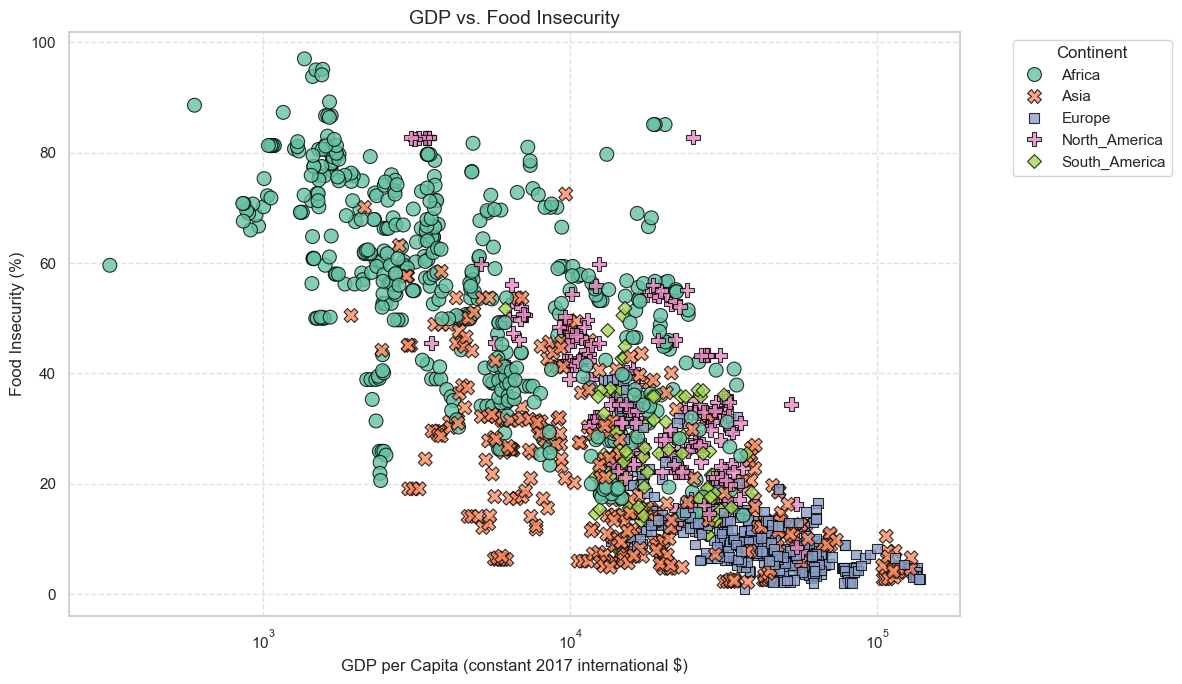

In [182]:
# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x='Gross domestic product per capita, PPP, (constant 2017 international $)',
    y='Moderate+Severe Food Insecurity (percent)',
    hue='continents',
    data=df,
    palette='Set2',
    style='continents',
    s=100,
    edgecolor='black',
    alpha=0.8
)

plt.xscale('log')
plt.title('GDP vs. Food Insecurity', fontsize=14)
plt.xlabel('GDP per Capita (constant 2017 international $)', fontsize=12)
plt.ylabel('Food Insecurity (%)', fontsize=12)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Analysis**

- There is a negative correlation between GDP growth and food insecurity.
- Countries with higher GDP per capita tend to have lower food insecurity, especially those in Europe.
- Conversely, countries with lower GDP per capita, particularly in Africa, experience higher levels of food insecurity.
- Some countries have moderate GDP levels, but they still face high food insecurity rates due to other contributing factors such as inequality, conflict, or poor infrastructure.

### Top 5 Improving and Worsening Countries (Food Insecurity)

In [183]:
# Calculate change over time
trends_fi = df.groupby('Area')['Moderate+Severe Food Insecurity (percent)'].agg(['first', 'last'])
trends_fi['Change'] = trends_fi['last'] - trends_fi['first']

# Top improvements
improvements = trends_fi.nsmallest(5, 'Change')

# Top deteriorations
deteriorations = trends_fi.nlargest(5, 'Change')

print("Top 5 Improvements:")
print(improvements)
print("=" * 50)
print("Top 5 Deteriorations:")
print(deteriorations)

Top 5 Improvements:
              first  last  Change
Area                             
Mongolia       38.6   5.3   -33.3
Eritrea        69.0  36.1   -32.9
Guinea         60.3  41.5   -18.8
Burkina Faso   58.2  40.7   -17.5
Somalia        97.0  79.7   -17.3
Top 5 Deteriorations:
             first  last  Change
Area                            
Nigeria       34.7  73.9    39.2
Afghanistan   45.1  80.9    35.8
Mauritania    26.3  61.2    34.9
Angola        47.4  79.2    31.8
Pakistan      14.1  44.9    30.8


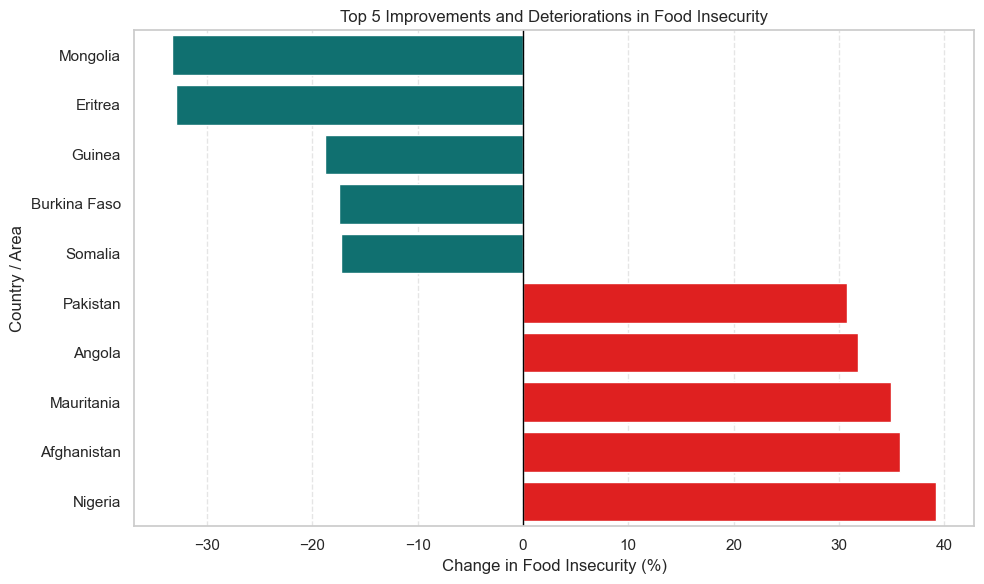

In [184]:
combined = pd.concat([improvements, deteriorations])
combined = combined.sort_values('Change')

colors = ['teal' if x < 0 else 'red' for x in combined['Change']]
combined['Area'] = combined.index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined,
    y='Area',
    x='Change',
    hue='Area',
    palette=colors,
    dodge=False,
    legend=False
)

plt.axvline(0, color='black', linewidth=1)
plt.title('Top 5 Improvements and Deteriorations in Food Insecurity')
plt.xlabel('Change in Food Insecurity (%)')
plt.ylabel('Country / Area')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Analysis**

- Mongolia, Eritrea, Guinea, Burkina Faso, and Somalia showed significant improvement, as their food insecurity levels decreased over time, indicating better food availability and improved nutritional conditions.
- Conversely, Pakistan, Angola, Mauritania, Afghanistan, and Nigeria experienced increased food insecurity, which may reflect worsening socio-economic conditions, conflict, or limited access to food resources.

### Average Food Insecurity by Political Stability Level

C:\Users\Yap Hui Qing\AppData\Local\Temp\ipykernel_7572\1690347655.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Yap Hui Qing\AppData\Local\Temp\ipykernel_7572\1690347655.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




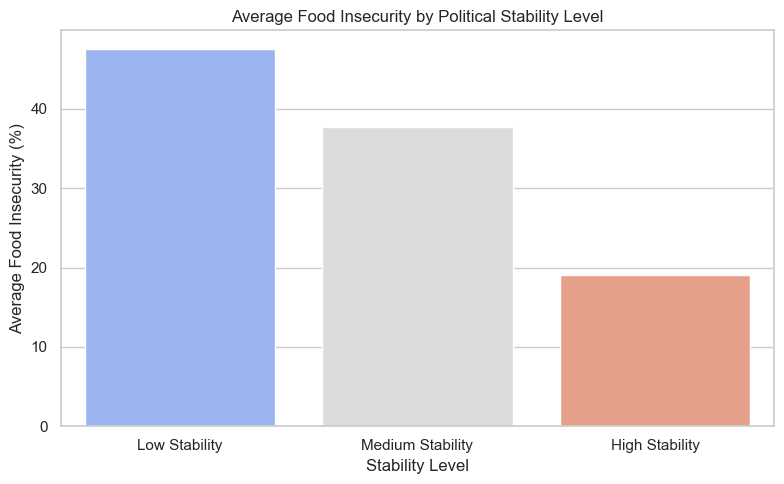

In [185]:
# Create categorical stability groups
df['Stability_Level'] = pd.cut(
    df['Political stability and absence of violence/terrorism (index)'],
    bins=[-3, -1, 0, 2],
    labels=['Low Stability', 'Medium Stability', 'High Stability']
)

# Group by stability level and calculate mean
avg_insecurity = df.groupby('Stability_Level')['Moderate+Severe Food Insecurity (percent)'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_insecurity,
    x='Stability_Level',
    y='Moderate+Severe Food Insecurity (percent)',
    palette='coolwarm'
)
plt.title('Average Food Insecurity by Political Stability Level')
plt.xlabel('Stability Level')
plt.ylabel('Average Food Insecurity (%)')
plt.tight_layout()
plt.show()

**Analysis**

1. Low stability countries tend to have the highest average levels of food insecurity (unstable politic, violence, instability may impact food supply chains, economic access to food and so forth)
2. Medium Stability Countries show moderate food insecurity, indicating some vulnerability but with more resilience or partial support systems in place.
3. High Stability Countries have the lowest levels of food insecurity on average, showing that politically stable environments likely support stronger food systems, better infrastructure, and more effective social safety nets.

### Global Per Capita Food Supply Variability

**metric that monitors the fluctuations in the average daily caloric supply accessible to individuals over a specific period.**

In [186]:
fig = px.choropleth(
    df,
    locations='Area',
    locationmode='country names',
    color='Per capita food supply variability (kcal/cap/day)',
    hover_name='Area',
    animation_frame='Year',
    color_continuous_scale='YlGnBu',
    title='Global Per Capita Food Supply Variability (kcal/cap/day)'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(
        title='Food Supply<br>Variability<br>(kcal/cap/day)'
    ),
    width=1000,
    height=600
)

fig.show()

### Food Supply Variability vs Food Insecurity

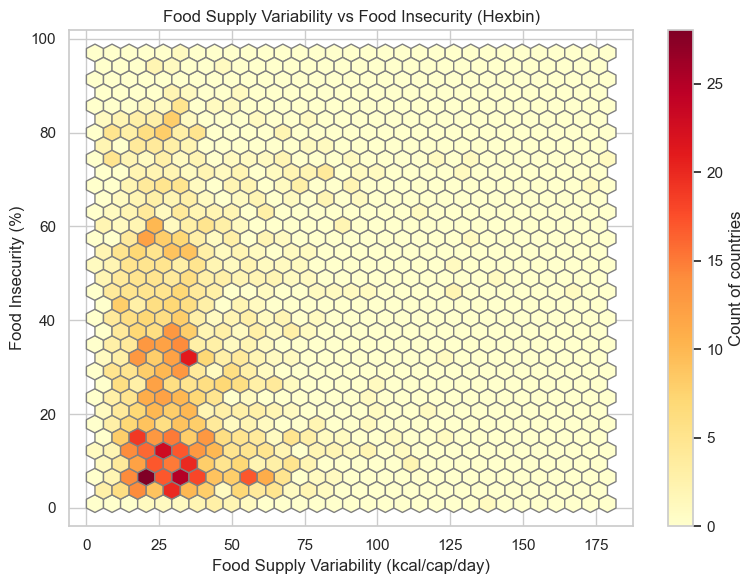

In [187]:
plt.figure(figsize=(8, 6))
plt.hexbin(
    df['Per capita food supply variability (kcal/cap/day)'],
    df['Moderate+Severe Food Insecurity (percent)'],
    gridsize=30, cmap='YlOrRd', edgecolors='grey'
)
plt.colorbar(label='Count of countries')
plt.title('Food Supply Variability vs Food Insecurity (Hexbin)')
plt.xlabel('Food Supply Variability (kcal/cap/day)')
plt.ylabel('Food Insecurity (%)')
plt.tight_layout()
plt.show()

**Analysis**

1. Most countries cluster where food supply variability is below 50 kcal/cap/day and food insecurity is below 25%, suggesting that stable food systems are generally associated with lower food insecurity.
2. There is a visible positive relationship: as food supply variability increases, food insecurity tends to rise. This implies that supply instability may be a key driver of food access issues.
3. Few countries show extremely low variability and high insecurity, suggesting other factors (e.g., conflict or poverty) might contribute in those edge cases.

### Dietary Energy Supply vs. Food Insecurity

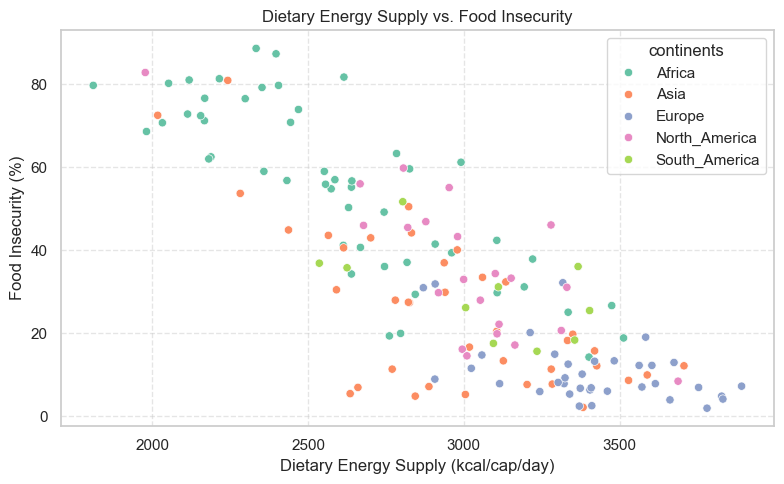

In [188]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df[df['Year'] == df['Year'].max()],
    x='Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
    y='Moderate+Severe Food Insecurity (percent)',
    hue='continents',
    palette='Set2'
)
plt.title('Dietary Energy Supply vs. Food Insecurity')
plt.xlabel('Dietary Energy Supply (kcal/cap/day)')
plt.ylabel('Food Insecurity (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Analysis**
- The scatter plot shows a negative correlation between dietary energy supply and food insecurity rates.
- As dietary energy supply increases, the percentage of people facing food insecurity tends to decrease.

**Africa**  
Many African countries have low dietary enerygy supply (below 2500 kcal/cap/day) and high food security (> 40%). This may represents food supply issues and  structural food insecurity.

**Asia & North America & South America**  
Some countries have adequate energy supply but still face moderate food insecurity, indicating distribution or affordability challenges

**Europe**  
Most countries - high dietary energy supply (> 2800 kcal) and low food security (< 20%).

### Global Undernourishment

In [189]:
fig = px.choropleth(
    df,
    locations='Area',
    locationmode='country names',
    color='Prevalence of undernourishment (percent) (3-year average)',
    hover_name='Area',
    animation_frame='Year',
    color_continuous_scale='Blues',
    title='Global Undernourishment (%)',
    labels={'Prevalence of undernourishment (percent) (3-year average)': 'Undernourishment (%)'}
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    width = 1000,
    height = 600
    )
fig.show()

### Top 10 Countries with Highest Undernourishment

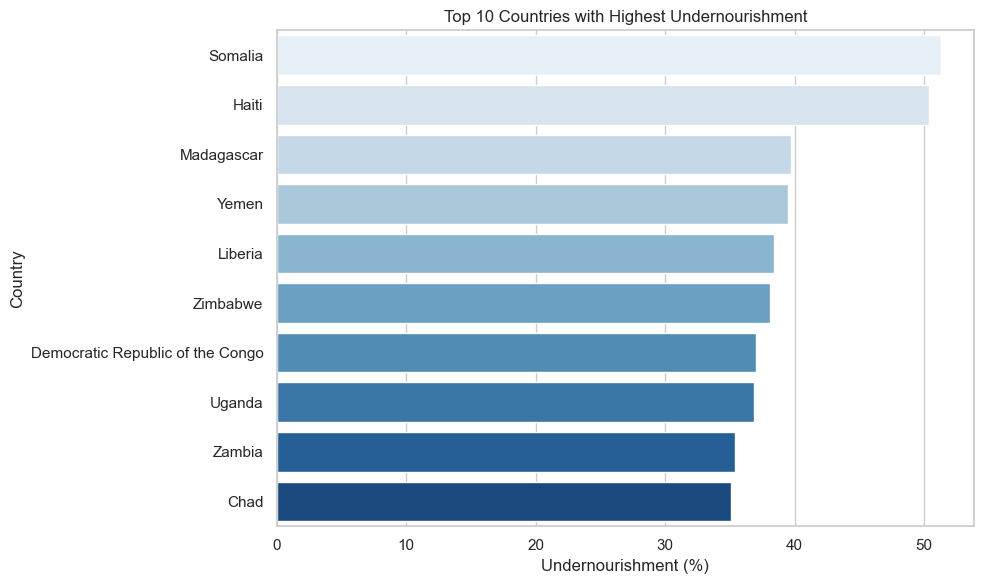

In [190]:
top10 = df[df['Year'] == 2023].nlargest(10, 'Prevalence of undernourishment (percent) (3-year average)')

plt.figure(figsize=(10, 6))
sns.barplot(
    x = 'Prevalence of undernourishment (percent) (3-year average)',
    y = 'Area',
    hue = 'Area',
    data = top10,
    palette = 'Blues',
    dodge = False
)
plt.title('Top 10 Countries with Highest Undernourishment')
plt.xlabel('Undernourishment (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Undernourishment Trend

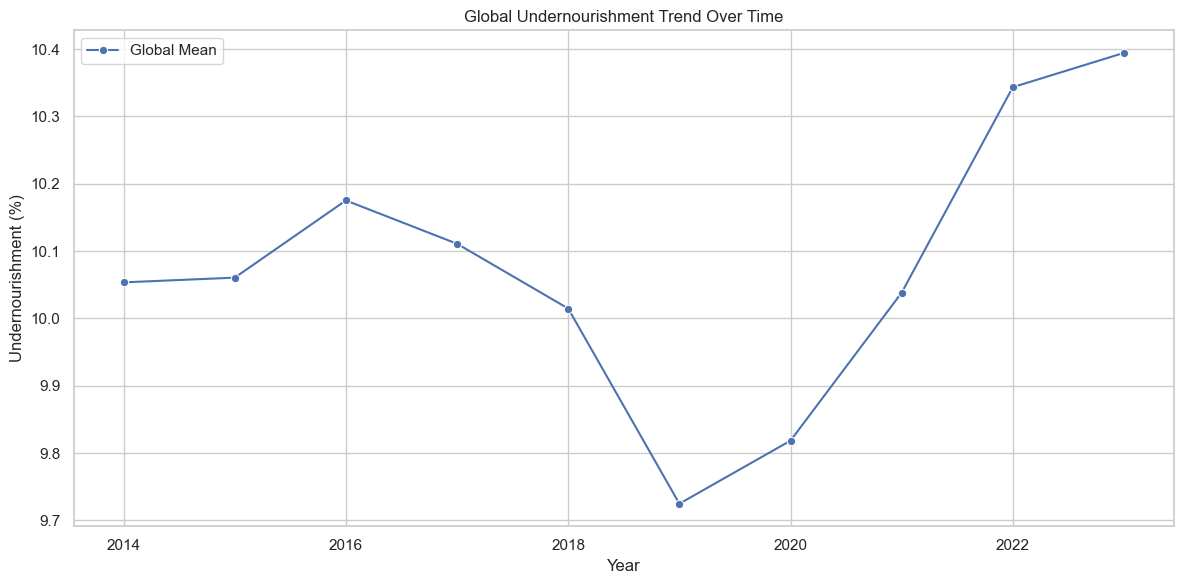

In [191]:
global_mean = df.groupby('Year')['Prevalence of undernourishment (percent) (3-year average)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x = 'Year',
    y = 'Prevalence of undernourishment (percent) (3-year average)',
    data = global_mean,
    errorbar = None,
    marker = 'o',
    label = 'Global Mean'
)
plt.title('Global Undernourishment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Undernourishment (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Analysis**

The global undernourishment rate showed a slight increase from 2014 to 2016, followed by a gradual decline until 2019. However, from 2019 to 2023, the percentage of undernourishment rose sharply.

### Undernourishment Trends by Continents

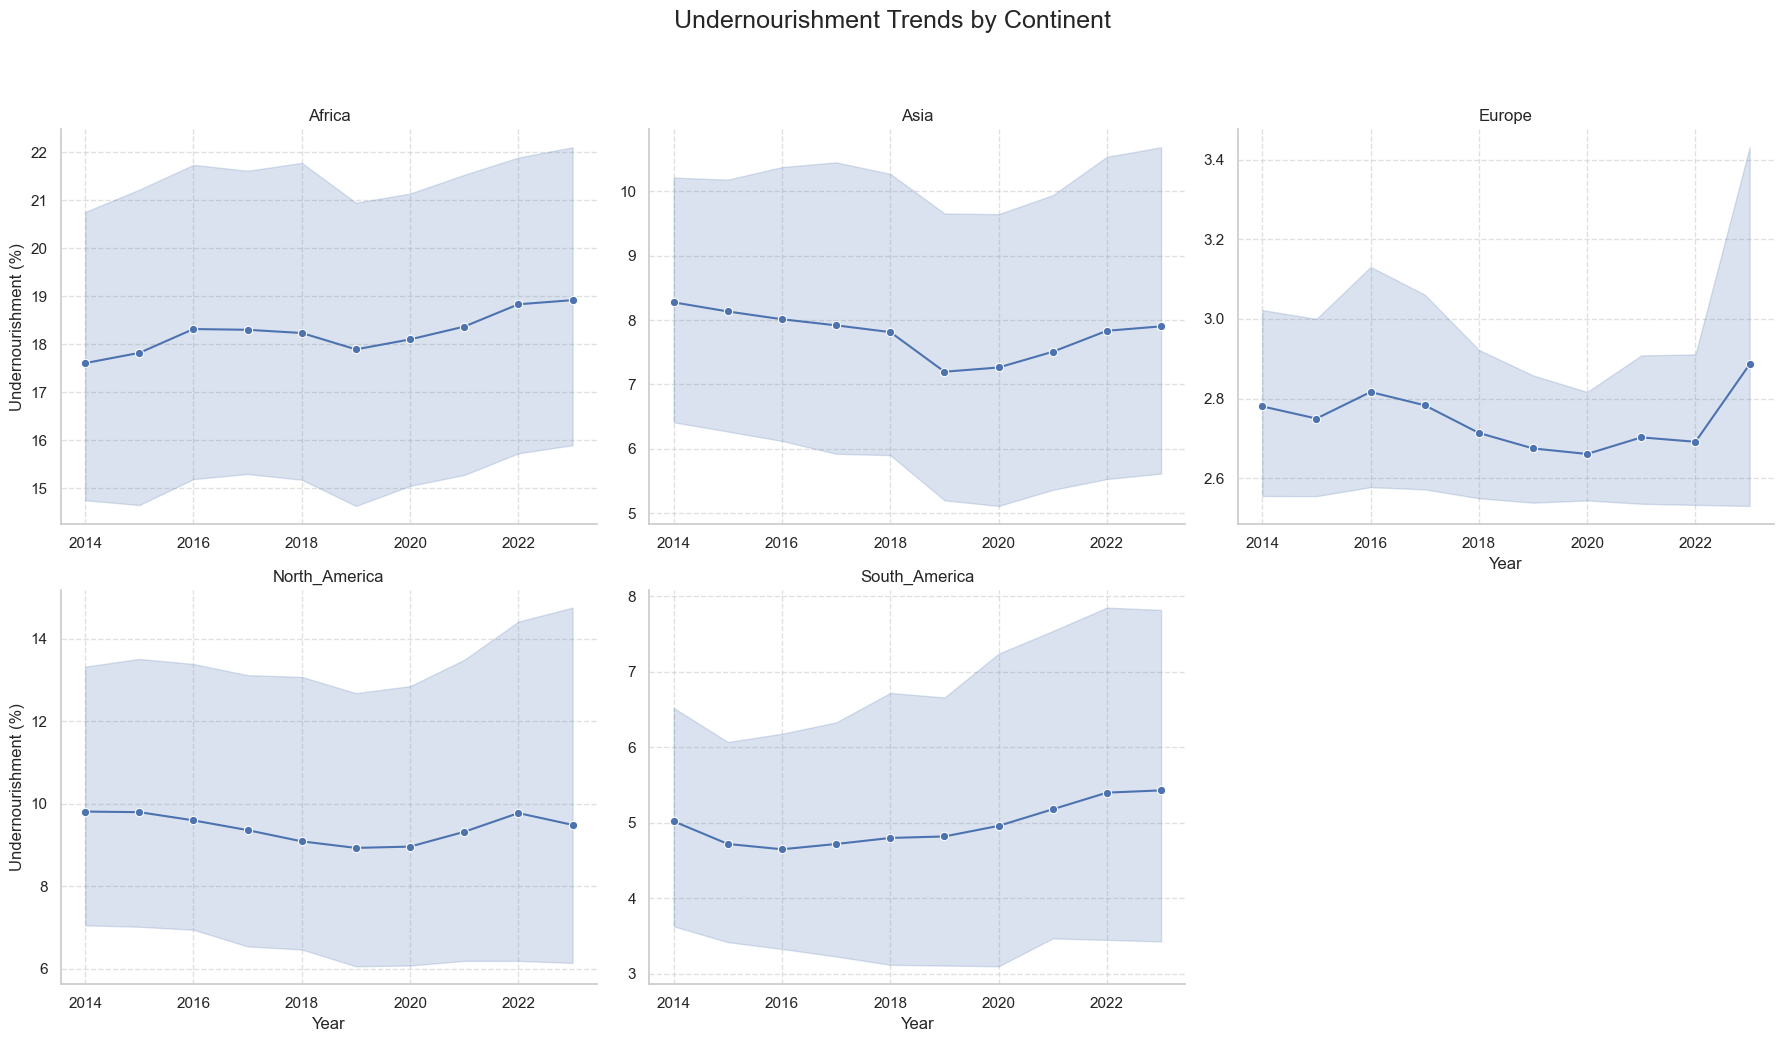

In [192]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(
    df,
    col='continents',
    col_wrap=3,
    height=5,
    sharey=False,
    aspect=1.2,
    palette="Set2"
)
g.map(sns.lineplot, 'Year', 'Prevalence of undernourishment (percent) (3-year average)', marker='o')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Undernourishment (%)")

for ax in g.axes.flat:
    ax.tick_params(axis='x')
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.grid(True, linestyle='--', alpha=0.6)

g.fig.suptitle('Undernourishment Trends by Continent', fontsize=18, y=1.04)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()

plt.show()

**Analysis**
1. The percentage of undernourishment is between 17% and 19% in Africa. 
2. Asia's undernourishment percent is between 7% and 9%. 
3. The percentage of undernourishment is between 2.6% and 3.0% in Europe.
4. The percentage of undernourishment is between 8% and 10% in North America.
5. The percentage of undernourishment is between 4% and 6% in South America. 

Africa has the highest percentage of undernourishment while Europe has the lowest undernourishment percent. 

## Correlation between undernourishment and GDP Growth

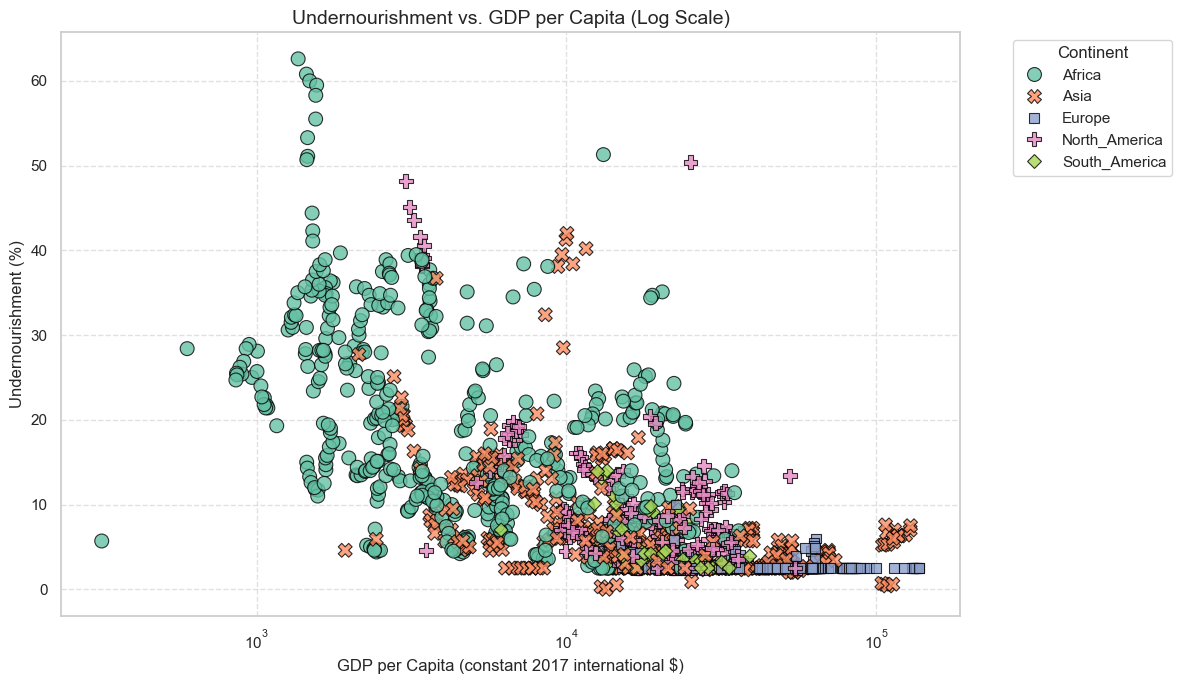

In [193]:
# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x='Gross domestic product per capita, PPP, (constant 2017 international $)',
    y='Prevalence of undernourishment (percent) (3-year average)',
    hue='continents',
    data=df,
    palette='Set2',
    style='continents',
    s=100,
    edgecolor='black',
    alpha=0.8
)

plt.xscale('log')  # Better handle GDP skew
plt.title('Undernourishment vs. GDP per Capita (Log Scale)', fontsize=14)
plt.xlabel('GDP per Capita (constant 2017 international $)', fontsize=12)
plt.ylabel('Undernourishment (%)', fontsize=12)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Analysis**

- There is a negative correlation between GDP per capita and undernourishment rates.
- Countries with high GDP per capita tend to have lower undernourishment, especially Europe countries.
- Conversely, countries with low GDP per capita, particularly in Africa, experience higher levels of undernourishment.
- Some countries have moderate GDP levels, but they still face high undernourishment rates.


## Top 5 Improving and Worsening Countries (Undernourishment)

In [194]:
# Calculate change over time
trends = df.groupby('Area')['Prevalence of undernourishment (percent) (3-year average)'].agg(['first', 'last'])
trends['Change'] = trends['last'] - trends['first']

# Top improvements
improvements = trends.nsmallest(5, 'Change')

# Top deteriorations
deteriorations = trends.nlargest(5, 'Change')

print("Top 5 Improvements:")
print(improvements)
print("=" * 50)
print("Top 5 Deteriorations:")
print(deteriorations)

Top 5 Improvements:
            first  last  Change
Area                           
Tajikistan   20.6   8.7   -11.9
Eritrea      25.9  14.0   -11.9
Somalia      62.6  51.3   -11.3
Mongolia     12.0   2.5    -9.5
Burundi      28.1  18.8    -9.3
Top 5 Deteriorations:
            first  last  Change
Area                           
Kenya        18.7  34.5    15.8
Uganda       24.4  36.9    12.5
Madagascar   27.8  39.7    11.9
Jordan        6.3  17.9    11.6
Chad         23.7  35.1    11.4


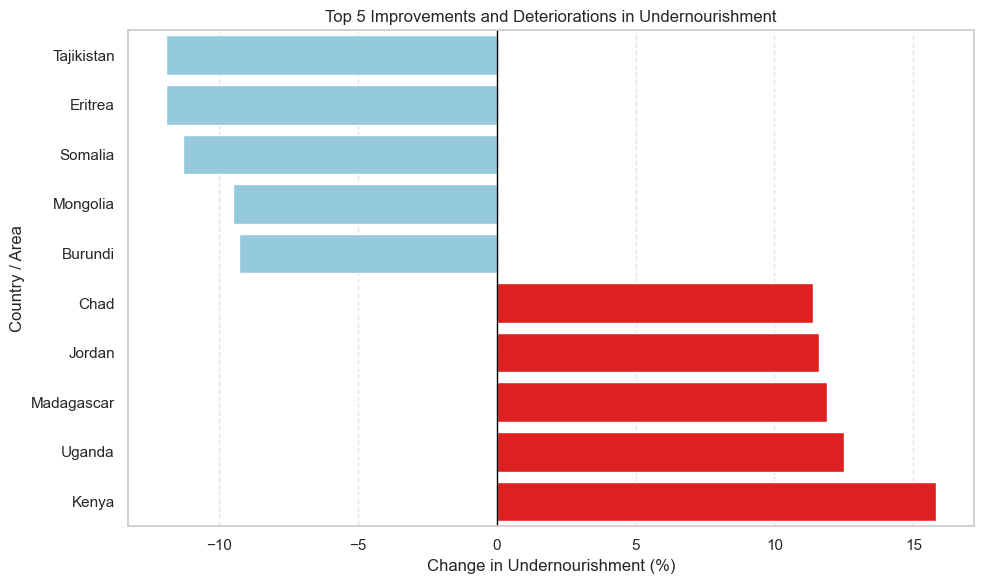

In [195]:
combined = pd.concat([improvements, deteriorations])
combined = combined.sort_values('Change')

colors = ['skyblue' if x < 0 else 'red' for x in combined['Change']]
combined['Area'] = combined.index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined,
    y='Area',
    x='Change',
    hue='Area',
    palette=colors,
    dodge=False,
    legend=False
)

plt.axvline(0, color='black', linewidth=1)
plt.title('Top 5 Improvements and Deteriorations in Undernourishment')
plt.xlabel('Change in Undernourishment (%)')
plt.ylabel('Country / Area')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Analysis**

- Tajikistan, Eritrea, Somalia, Mongolia, and Burundi showed significant improvement, as their undernourishment rates decreased over time, indicating better food availability and nutrition conditions.
- Conversely, Chad, Jordan, Madagascar, Uganda, and Kenya experienced deterioration, with undernourishment rates increasing, which may reflect worsening food insecurity or socio-economic challenges.

### Caloric Loss vs. Food Insecurity

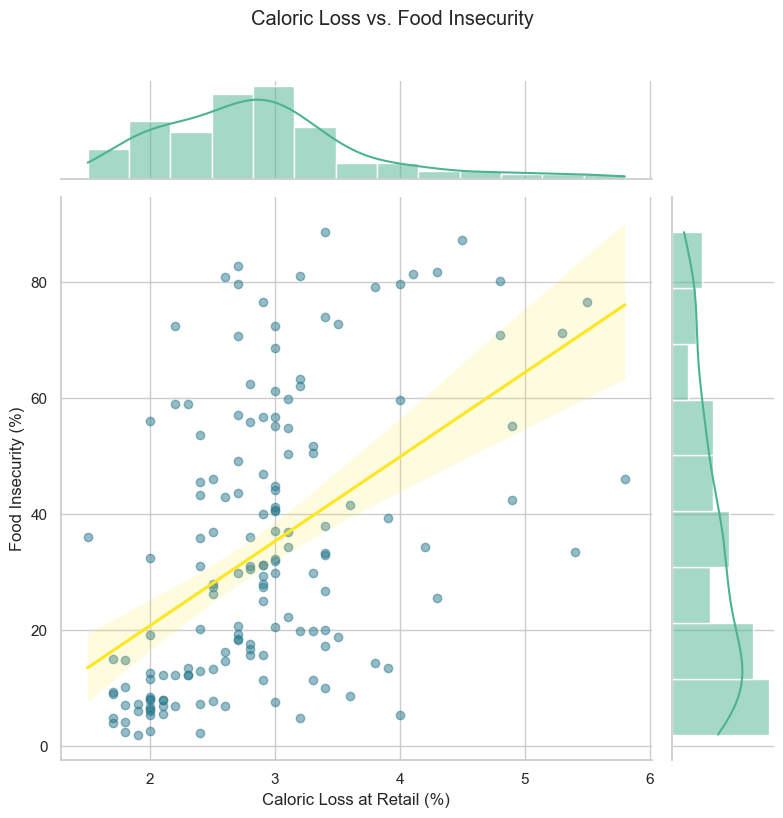

In [196]:
sns.jointplot(
    data=df[df['Year'] == df['Year'].max()],
    x='Incidence of caloric losses at retail distribution level (percent)',
    y='Moderate+Severe Food Insecurity (percent)',
    kind='reg',
    height=8,
    marginal_kws={'kde': True, 'color': '#4CB391'},
    scatter_kws={'alpha': 0.5, 'color': '#2A788E'},
    line_kws={'color': '#FDE725'}
)
plt.suptitle('Caloric Loss vs. Food Insecurity', y=1.02)
plt.xlabel('Caloric Loss at Retail (%)')
plt.ylabel('Food Insecurity (%)')
plt.tight_layout()
plt.show()

**Analysis**
1. The graph shows the positive correlation, indicating the higher the retail losses, the higher the food insecurity. (reason: reduced effective supply)

- High loss and low insecurity: efficient redistribution (e.g., food banks in wealthy nations).
- Low loss and high insecurity: non-supply issues (e.g., poverty, conflict).

### Average Caloric Loss at Retail by Continent

C:\Users\Yap Hui Qing\AppData\Local\Temp\ipykernel_7572\1031684527.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




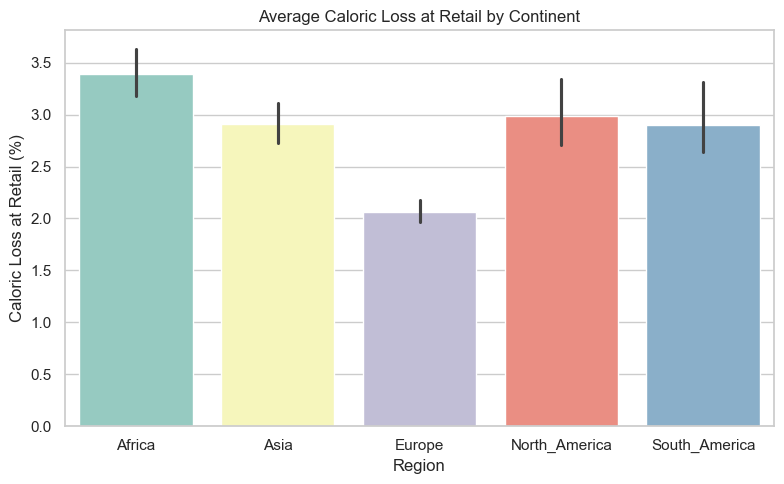

In [197]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df[df['Year'] == df['Year'].max()],
    x='continents',
    y='Incidence of caloric losses at retail distribution level (percent)',
    palette='Set3'
)
plt.title('Average Caloric Loss at Retail by Continent')
plt.xlabel('Region')
plt.ylabel('Caloric Loss at Retail (%)')
plt.tight_layout()
plt.show()

**Analysis**

The rank of caloric loss at retail distribution level: Africa, North America, Asia, South America and Europe

### Top/Bottom 10 Countries by Caloric Loss at Retail (with Food Insecurity Context)

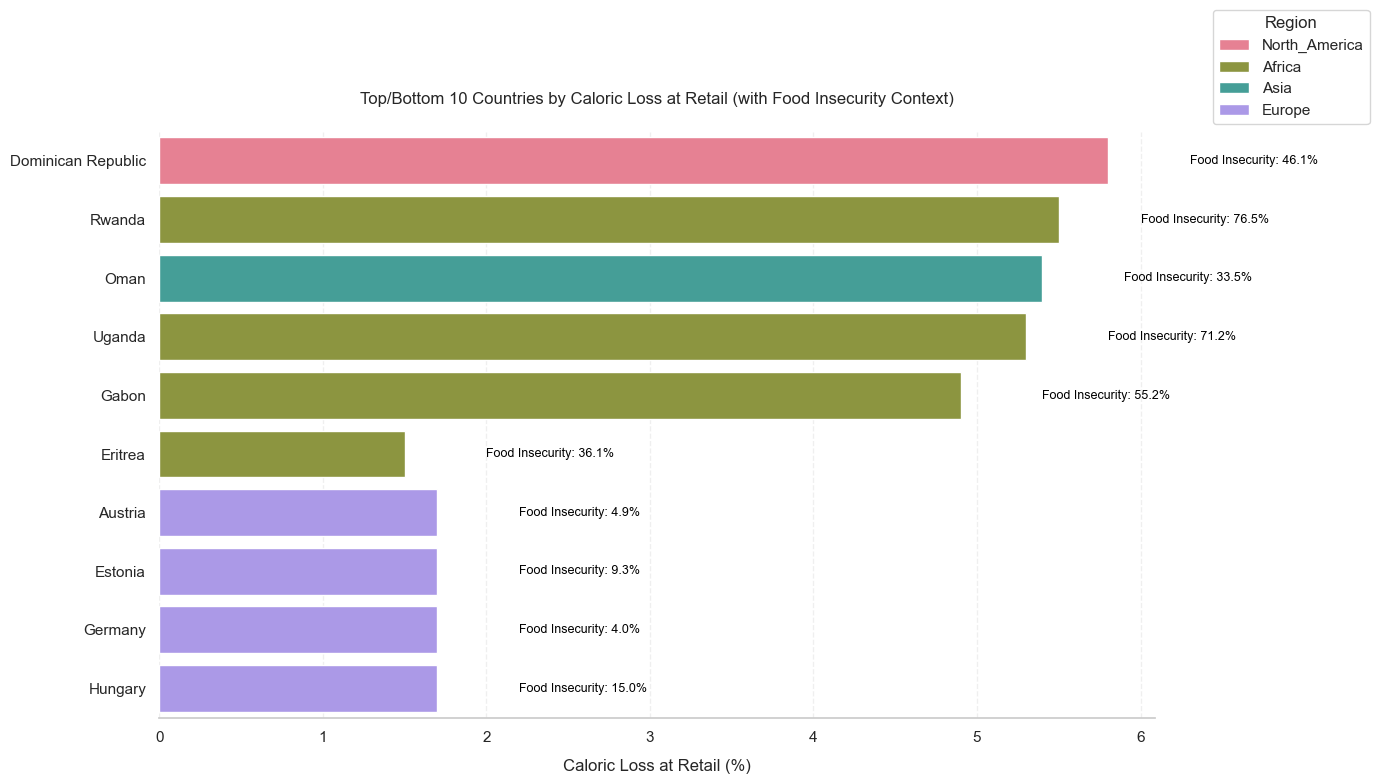

In [198]:
# Prepare data
latest = df[df['Year'] == df['Year'].max()]
top10 = latest.nlargest(5, 'Incidence of caloric losses at retail distribution level (percent)')
bottom10 = latest.nsmallest(5, 'Incidence of caloric losses at retail distribution level (percent)')
combined = pd.concat([top10, bottom10])

# Create figure
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=combined,
    y='Area',
    x='Incidence of caloric losses at retail distribution level (percent)',
    hue='continents',
    palette='husl',
    dodge=False
)

# Add food insecurity labels
for i, (_, row) in enumerate(combined.iterrows()):
    ax.text(
        row['Incidence of caloric losses at retail distribution level (percent)'] + 0.5,  # X-position
        i,  # Y-position (bar index)
        f"Food Insecurity: {row['Moderate+Severe Food Insecurity (percent)']:.1f}%",
        ha='left',
        va='center',
        fontsize=9,
        color='black'
    )

# Customize
plt.title('Top/Bottom 10 Countries by Caloric Loss at Retail (with Food Insecurity Context)', pad=20)
plt.xlabel('Caloric Loss at Retail (%)', labelpad=10)
plt.ylabel('')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='best')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine(left=True)
plt.tight_layout()
plt.show()

**Analysis**

**Top 5 (High caloric loss at retail)**  
Dominican Republic, Rwanda, Oman, Uganda, Gabon

**Bottom 5 (Low caloric loss at retail)**  
Eritrea, Austria, Estonia, Germany, Hungary

### Global Obesity Trend

In [199]:
# Filter to latest year
latest = df[df['Year'] == df['Year'].max()]

fig = px.choropleth(
    df,
    locations='Area',
    locationmode='country names',
    color='Prevalence of obesity in the adult population (18 years and older) (percent)',
    hover_name='Area',
    animation_frame='Year',
    color_continuous_scale='Plasma',
    title='Global Obesity Prevalence (Adults 18+) Over Time'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    width=1000,
    height=600,
    coloraxis_colorbar=dict(title='Obesity (%)')
)

fig.show()


### Food Insecurity & Undernourishment vs Obesity

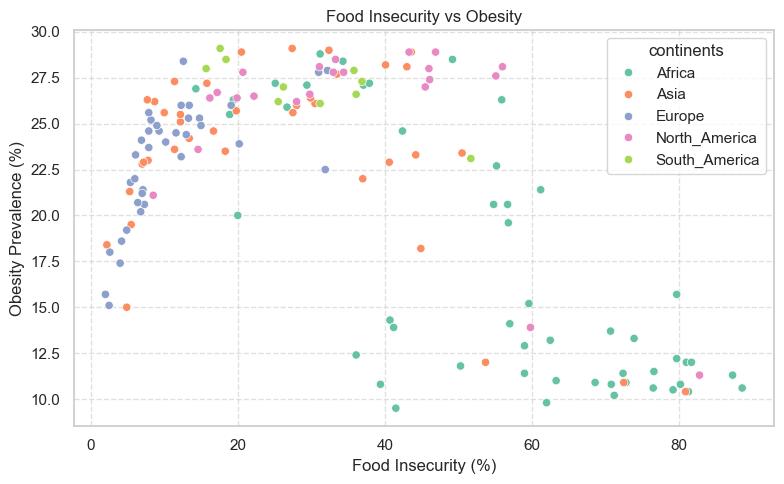

In [200]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df[df['Year'] == df['Year'].max()],
    x='Moderate+Severe Food Insecurity (percent)',
    y='Prevalence of obesity in the adult population (18 years and older) (percent)',
    hue='continents',
    palette='Set2'
)
plt.title('Food Insecurity vs Obesity')
plt.xlabel('Food Insecurity (%)')
plt.ylabel('Obesity Prevalence (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


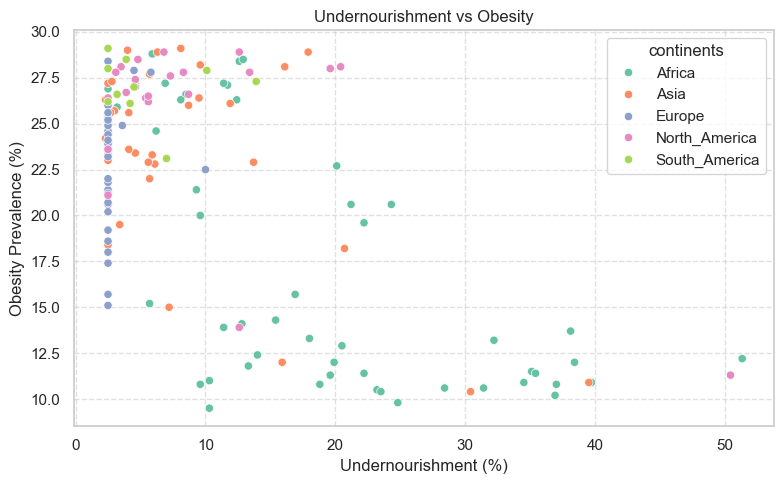

In [201]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df[df['Year'] == df['Year'].max()],
    x='Prevalence of undernourishment (percent) (3-year average)',
    y='Prevalence of obesity in the adult population (18 years and older) (percent)',
    hue='continents',
    palette='Set2'
)
plt.title('Undernourishment vs Obesity')
plt.xlabel('Undernourishment (%)')
plt.ylabel('Obesity Prevalence (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Analysis**

Low-to middle income countries: High food insecurity, low obesity and low undernourishment.  
High income countries: low food insecurity, high obesity and low undernourishment.


### Obesity Prevalence Trends by Region

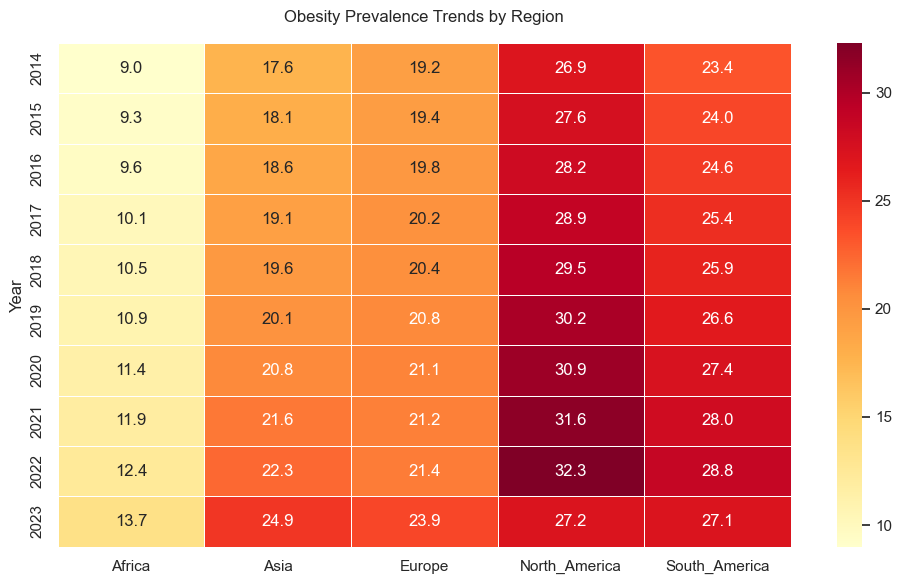

In [202]:
# Pivot for heatmap (Years vs Continents)
heatmap_data = df.pivot_table(
    index='Year',
    columns='continents',
    values='Prevalence of obesity in the adult population (18 years and older) (percent)',
    aggfunc='median'
)

plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    linewidths=0.5
)

plt.title('Obesity Prevalence Trends by Region', pad=15)
plt.xlabel('')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

### Top 5 Countries with Highest Exclusive Breastfeeding

C:\Users\Yap Hui Qing\AppData\Local\Temp\ipykernel_7572\42950558.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




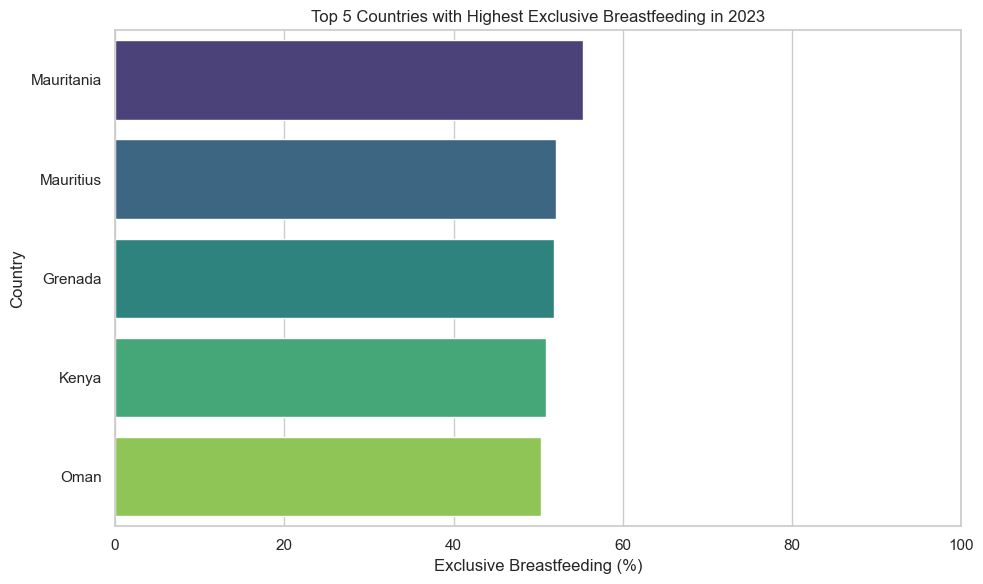

In [207]:
# Filter latest year
latest_year = df['Year'].max()
latest = df[df['Year'] == latest_year]

# Get top 5 countries
top5_breastfeeding = latest.nlargest(
    5, 'Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)'
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_breastfeeding,
    x='Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)',
    y='Area',
    palette='viridis'
)
plt.title(f'Top 5 Countries with Highest Exclusive Breastfeeding in {latest_year}')
plt.xlabel('Exclusive Breastfeeding (%)')
plt.ylabel('Country')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()
